In [1]:
#ch07_01_MLP_b.ipynb

In [2]:
#關於 keras sequential model 中，參數epochs 與 batch_size 

In [3]:
#step1 讀取並預處理資料

In [4]:
#step1.1 匯入所需模組, keras.utils.np_utils
from keras.utils import np_utils
import numpy as np

C:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [5]:
#step1.1.a 將亂數種子固定
np.random.seed(10)

In [6]:
#step1.2 從keras.dataset 讀取 mnist 資料集
from keras.datasets import mnist

In [7]:
#step1.2.1 以mnist.load_data() method 讀取資料,(train/test)
(x_train_image,y_train_label),(x_test_image,y_test_label)=mnist.load_data()

In [8]:
#step1.3 將features(28x28 數字影像特徵值) reshape 為 1 dimension array 
#                                       (28x28=784),並轉換為 float32
x_Train=x_train_image.reshape(60000,784).astype('float32')
x_Test=x_test_image.reshape(10000,784).astype('float32')

In [9]:
#step1.4 將1.3的features標準化 (0.0~255.0)-->(0.0~1.0)
x_Train_normalize=x_Train/255
x_Test_normalize=x_Test/255

In [10]:
#step1.5 將label值(0,1,~9) One-hot encoding 編碼, 
#        使用 np_utils.to_categorical() method
y_Train_OneHot=np_utils.to_categorical(y_train_label)
y_Test_OneHot=np_utils.to_categorical(y_test_label)

In [11]:
#step2. 建立MLP模型, 輸入層(x),784個神經元;  隱藏層(h),256個神經元; 輸出層(y),10個神經元 

In [12]:
#step2.1 或入所需模組 keras.model.Sequentail, keras.layers.Dense
from keras.models import Sequential
from keras.layers import Dense

In [13]:
#step2.2 建立一個 Sequential model 's_model'
#        The core data structure of Keras is a model, a way to organize layers.
#        The simplest type of model is the Sequential model, a linear stack of layers. 
s_model=Sequential()  #Linear stack of layers.

In [14]:
#step2.3 建立輸入層(x)及隱藏層(h), 以Sequential.add() method, 加入 Dense神經網路層
#        Dense() 函數 實作 h=relu(x*w1+b1) 隱藏層
s_model.add(Dense(units=256,                      #設定隱藏層神經元個數256
                 input_dim=784,                   #設定輸入層神經元個數784
                 kernel_initializer='normal',     #使用 normal distribution 亂數,初始化 weight及bias
                 activation='relu'))              #activation function 'relu'

In [15]:
#step2.4 建立「輸出層」,使用Sequential.add() , Dense()
#        輸出層 activattion function 使用 softmax
#        Dense() 函數 實作 y=softmax(h1*w2+b2) 輸出層 
s_model.add(Dense(units=10,                      #設定輸出層神經元個數為10
                 kernel_initializer='normal',    #使用 normal distribution 亂數,初始化 weight及bias
                 activation='softmax'))          #activation function 'softmax'

In [16]:
#====================================================================
#建立深度學習模型後，就可以使用反向傳播演算法(Back Propagation)進行訓練
#step3. 進行訓練

In [17]:
#step3.1 定義訓練方式
#        以 Sequential.compile(), 設定模型訓練方式
#        Compilation:
#        Before training a model, you need to configure the learning process, 
#        which is done via the compile method. It receives three arguments:
#            1.An optimizer.      (設定訓練時的優化方法, 如adam)
#            2.A loss function.   (設定損失函數, 如 cross_entropy)
#            3.A list of metrics. (設定評估模型的方式, 如 accuracy)
s_model.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

In [18]:
#step3.2 開始訓練, 以Sequential.fit(),batch_size 設定為預設值 32, epochs 不變，仍為10 
train_history=s_model.fit(x=x_Train_normalize,                 #feature 數字影像標準化值
                         y=y_Train_OneHot,validation_split=0.2, #lebel One-Hot encoding 值
                         epochs=10,batch_size=32,verbose=2)    #epochs, 訓練週期為 10

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 7s - loss: 0.2691 - acc: 0.9228 - val_loss: 0.1320 - val_acc: 0.9616
Epoch 2/10
 - 6s - loss: 0.1074 - acc: 0.9684 - val_loss: 0.1050 - val_acc: 0.9685
Epoch 3/10
 - 6s - loss: 0.0712 - acc: 0.9785 - val_loss: 0.0919 - val_acc: 0.9726
Epoch 4/10
 - 6s - loss: 0.0512 - acc: 0.9840 - val_loss: 0.0828 - val_acc: 0.9758
Epoch 5/10
 - 6s - loss: 0.0373 - acc: 0.9885 - val_loss: 0.0813 - val_acc: 0.9750
Epoch 6/10
 - 6s - loss: 0.0267 - acc: 0.9919 - val_loss: 0.0757 - val_acc: 0.9782
Epoch 7/10
 - 6s - loss: 0.0206 - acc: 0.9934 - val_loss: 0.0884 - val_acc: 0.9768
Epoch 8/10
 - 6s - loss: 0.0171 - acc: 0.9946 - val_loss: 0.0853 - val_acc: 0.9783
Epoch 9/10
 - 5s - loss: 0.0126 - acc: 0.9959 - val_loss: 0.1012 - val_acc: 0.9748
Epoch 10/10
 - 6s - loss: 0.0107 - acc: 0.9967 - val_loss: 0.0965 - val_acc: 0.9778


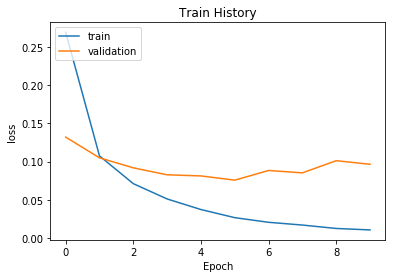

In [21]:
#step3.3 顯示(繪圖)訓練過程
#        讀取 train_history 中 loss 與 accuracy, 繪圖
import toolFunction 
#step3.5 畫出 loss 誤差值
%matplotlib inline
toolFunction.show_train_history(train_history,'loss','val_loss')

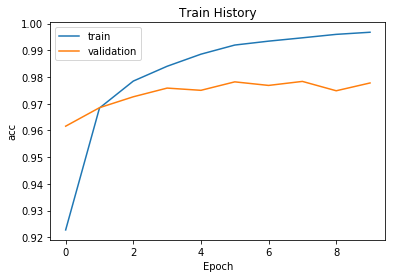

In [22]:
#step3.4 畫出 accuracy 執行結果, 使用 show_train_history
toolFunction.show_train_history(train_history,'acc','val_acc')

In [23]:
#step4. 以獨立的 10000 筆測試資料 (x_test_image,y_test_label) 評估模型準確率
#       使用 Sequential.evaluate() method
score=s_model.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',score[1])

10000/10000 [==============================] - 0s 28us/step

accuracy= 0.9778


In [25]:
#step2.2 建立一個 Sequential model 's_model_2000'
s_model_2000=Sequential()  #Linear stack of layers.

s_model_2000.add(Dense(units=256,                      #設定隱藏層神經元個數256
                 input_dim=784,                   #設定輸入層神經元個數784
                 kernel_initializer='normal',     #使用 normal distribution 亂數,初始化 weight及bias
                 activation='relu'))              #activation function 'relu'

s_model_2000.add(Dense(units=10,                      #設定輸出層神經元個數為10
                 kernel_initializer='normal',    #使用 normal distribution 亂數,初始化 weight及bias
                 activation='softmax'))          #activation function 'softmax'

s_model_2000.compile(loss='categorical_crossentropy',
               optimizer='adam',metrics=['accuracy'])

In [26]:
#一個較極端的 batch_size 設定為 2000, epochs 不變，仍為10 
train_history=s_model_2000.fit(x=x_Train_normalize,                 #feature 數字影像標準化值
                         y=y_Train_OneHot,validation_split=0.2, #lebel One-Hot encoding 值
                         epochs=10,batch_size=2000,verbose=2)    #epochs, 訓練週期為 10

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 1.2610 - acc: 0.7109 - val_loss: 0.5303 - val_acc: 0.8703
Epoch 2/10
 - 1s - loss: 0.4418 - acc: 0.8826 - val_loss: 0.3368 - val_acc: 0.9077
Epoch 3/10
 - 1s - loss: 0.3304 - acc: 0.9072 - val_loss: 0.2851 - val_acc: 0.9208
Epoch 4/10
 - 1s - loss: 0.2854 - acc: 0.9198 - val_loss: 0.2551 - val_acc: 0.9291
Epoch 5/10
 - 1s - loss: 0.2542 - acc: 0.9291 - val_loss: 0.2330 - val_acc: 0.9365
Epoch 6/10
 - 1s - loss: 0.2296 - acc: 0.9362 - val_loss: 0.2145 - val_acc: 0.9406
Epoch 7/10
 - 1s - loss: 0.2080 - acc: 0.9423 - val_loss: 0.1982 - val_acc: 0.9455
Epoch 8/10
 - 1s - loss: 0.1908 - acc: 0.9466 - val_loss: 0.1849 - val_acc: 0.9491
Epoch 9/10
 - 1s - loss: 0.1759 - acc: 0.9503 - val_loss: 0.1744 - val_acc: 0.9526
Epoch 10/10
 - 1s - loss: 0.1618 - acc: 0.9540 - val_loss: 0.1644 - val_acc: 0.9551


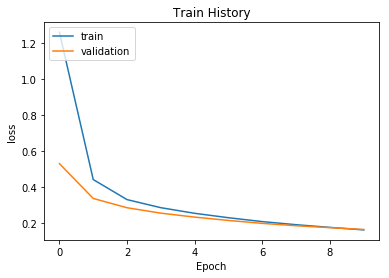

In [27]:
toolFunction.show_train_history(train_history,'loss','val_loss')

In [29]:
score=s_model_2000.evaluate(x_Test_normalize,y_Test_OneHot)
print()
print('accuracy=',score[1])

10000/10000 [==============================] - 0s 29us/step

accuracy= 0.953
